In [21]:
from __future__ import absolute_import, division, print_function
import argparse
import os
import sys
import numpy as np
import pdb
from random import shuffle
import pandas as pd
from astropy.io import fits
from astropy.io.fits import getheader
from tf_util import example_util
import matplotlib.pylab as plt
import matplotlib as mpl

In [22]:
outfile = 'HARPS2.3.1_ready_for_TF_records.npz'#'HARPS2.3.1_ready_for_TF_records.npz'#'
npzfile = np.load(outfile) 
npzfile.files

['BJD',
 'vrad_star',
 'og_ccf_list',
 'jup_shifted_CCF_data_list',
 'zero_shifted_CCF_list',
 'CCF_normalized_list',
 'cff_residual_list',
 'ccf_residual_rescaled',
 'CCF_normalized_list_cutoff',
 'CCF_residual_list_cutoff',
 'ccf_residual_rescaled_cutoff',
 'mu_og_list',
 'mu_jup_list',
 'mu_zero_list',
 'fwhm',
 'cont',
 'bis',
 'shift_by_rv']

In [23]:
# Define a function that plots the ccfs

def residual_plot(rv_list, x_axis, ccfs_of_interest, num_ref_ccf, plot_title, skip_indexes):
    # create color scheme
    min_rv = np.min(rv_list)
    max_rv = np.max(rv_list)
    cscale_residuals = (np.array(rv_list - min_rv) / (max_rv - min_rv))
    print(np.min(cscale_residuals), np.max(cscale_residuals))

    col = plt.cm.jet([0.25, 0.75])
    n = len(ccfs_of_interest)
    colors = plt.cm.bwr(cscale_residuals)

    # Create the residual plot by looping through the list of CCFs ordered by date
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    num = 0
    for i in np.arange(0, len(ccfs_of_interest)):
        if i in skip_indexes:
            num += 1
            continue
        if num_ref_ccf == "median":
            plt.plot(x_axis, ccfs_of_interest[i] - np.median(list(ccfs_of_interest), axis=0), color=colors[num])
        else:
            if i != num_ref_ccf:
                plt.plot(x_axis, ccfs_of_interest[i] - ccfs_of_interest[num_ref_ccf], color=colors[num])
        num += 1

    plt.title(plot_title)
    # make color bar
    cmap = mpl.cm.bwr
    norm = mpl.colors.Normalize(vmin=(min_rv - np.median(rv_list)), vmax=(max_rv - np.median(rv_list)))
    cb = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation="vertical", pad=-0.0001)
    cb.set_label(label='Stellar Activity Signal (m/s)', size=16, rotation=270, labelpad=20)


0.0 1.0


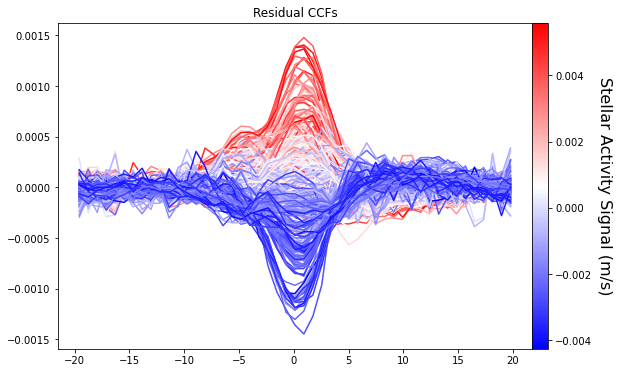

In [24]:
x_axis = np.linspace(-19.58, 19.78, 49)

residual_plot(npzfile['vrad_star'],x_axis, npzfile['cff_residual_list'],
             "median", "Residual CCFs", [])

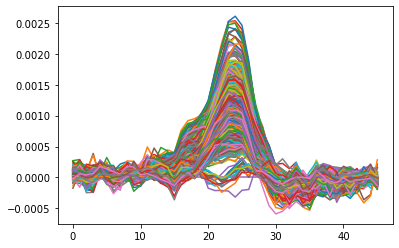

In [25]:
# simple ccf plot

for i in npzfile['CCF_residual_list_cutoff']:
    plt.plot(i)